In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
%matplotlib inline 

filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Na_Nap_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Mg_Mgp_Feb.nc"

filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_T_Z3_e_Feb.nc"
#filename3="Nc_Files/Jianfei_WACCMX_files/waccmx_winds_Feb.nc"

M = filename[-10:]
Metal=M[0:2]
#print(Metal)

ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
#ds2
ds

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, lev: 126, ilev: 127, time: 672, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev        (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 929.6 970.6 992.6
  * ilev       (ilev) float64 3.551e-10 4.559e-10 5.854e-10 ... 985.1 1e+03
  * time       (time) object 0001-02-01 00:00:00 ... 0001-02-28 23:00:00
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 ...
    hybm       (lev) float64 ...
    P0         float64 ...
    hyai       (ilev) float64 ...
    hybi       (ilev) float64 ...
    time_bnds  (time, nbnd) object ...
    Fe         (time, lev, lat, lon) float32 ...
    Fep        (time, lev, lat, lon) float32 ...
    PS         (time, lat, lon) float32 ...
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      cesm213_FX2000_f19f19mg16_Na_Fe_ion_NOp
    logname:                   wujf
    host:                      
    initial_file:              /home/xuexh/wujf/cesm/case/cesm210_FX2000_f19f...
    topography_file:           /home/database/cesm/inputdata/atm/cam/topo/USG...
    model_doi_url:             https://doi.org/10.5065/D67H1H0V
    time_period_freq:          hour_1
    history:                   Sat Jan 22 12:02:06 2022: ncrcat -c -v Fe,Fep ...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [2]:
time = ds.variables['time']
times = xr.cftime_range(start="0001-02-01", periods=672, freq="1H", calendar="noleap")
times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
times3 = ds["time"].dt.strftime("%Y%m%d")

#times
#times2
#times3

In [3]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

#M = ds.variables[str(Metal)]
#Mp = ds.variables[str(Metal)+'p']

dst = ds.transpose("lev", ...)
Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']

#Mt[:,1,1,1]
#lev
#dst
#geopH[-1,1,1,1]
#temp
#lat

In [4]:
ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']
elect = ds2t.variables['e']

geopH = ds2t.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

#Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
Mptdens = ( Mpt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
edens = ( elect * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

#Mtdens2 = Mtdens / 1000 # convert to 10^3 cm-3
#Mptdens2 = Mptdens / 1000 # convert to 10^3 cm-3

In [5]:
#-----Set up plot variables for plot 1 ------

lev_plot_ind = 55   #57#=(6.3e-04)
lev_plot = lev[lev_plot_ind]
lev_plot_str = str("%.1e" % lev_plot)

Zavg_plot = Zavg[lev_plot_ind]
Zavg_plot_str = str("%.1f" % Zavg_plot)

time_plot_ind = 3
time_plot_str = str(times[time_plot_ind])
time_plot_str2 = str(time_plot_str[0:13])+'h'



#Mtdens = [lev:126,time:672,lat:96,lon:144]
Mptdens_plot = Mptdens[lev_plot_ind,time_plot_ind,:,:] #-> [96,144]
edens_plot = edens[lev_plot_ind,time_plot_ind,:,:]

#Mtdens_plot
#Zavg_plot
#time_plot_str
print('Plot Pressure = '+ lev_plot_str)
print('Plot geopH = '+ Zavg_plot_str)
print(time_plot_str2)

Plot Pressure = 3.8e-04
Plot geopH = 96.6
0001-02-01 03h


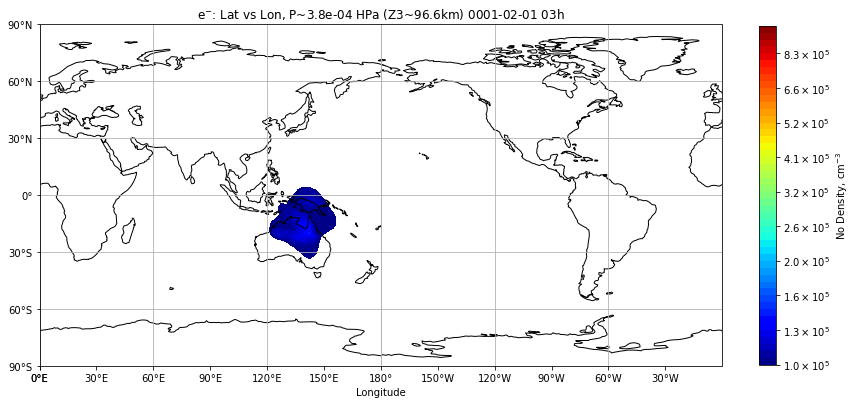

In [15]:
#------------------------Plot 1: e-----------------------------

#ticks = np.geomspace(3*10**2, 6*10**4)
#ticks = np.geomspace(1*10**3, 1*10**6)
ticks = np.geomspace(1*10**5, 1*10**6)

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()

C = plt.contourf(lon, lat, edens_plot, 
                 levels=ticks,
                 transform=ccrs.PlateCarree(),
                 locator=ticker.LogLocator(),
                 #extend='both',
                 cmap=jet)

ax.coastlines() 
ax.gridlines()

ax.set_xlabel('Longitude')

ax.set_xticks([0, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
#ax.set_xticks([0, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())  

ax.set_title('e$^{-}$: Lat vs Lon, P~' + lev_plot_str + ' HPa (Z3~'+ Zavg_plot_str + 'km) '+ time_plot_str2)

#ax2 = ax.twiny()
#ax2.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt), fraction=0.023, pad=0.05)
#-------------------
#cbar = fig.colorbar(C,format='%.0e', fraction=0.023, pad=0.05)  #,ticks=ticks[::2]

cbar.set_label(r'No Density, cm$^{-3}$')

figname='e Lat vs Lon P ' + lev_plot_str + ' HPa, z '+ Zavg_plot_str + 'km, '+ time_plot_str2 + '.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300) #
plt.tight_layout()
plt.show()

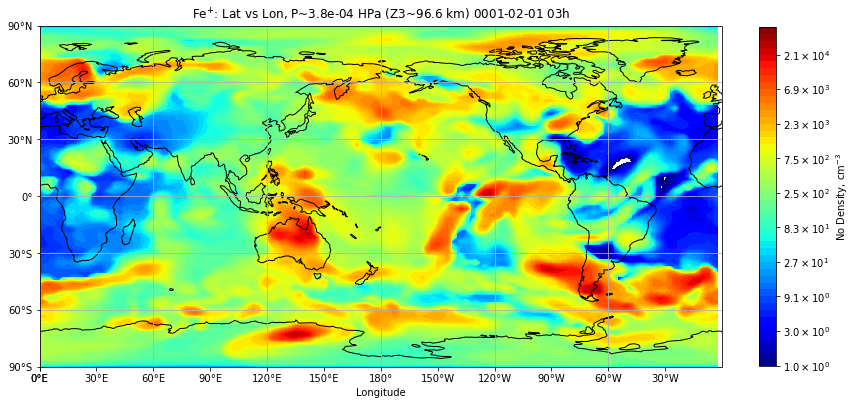

In [7]:
#------------------------Plot 1: Mp-----------------------------

#ticks = np.linspace(0, 18, num=19) 
#ticks = np.logspace(1, 4)
ticks = np.geomspace(1, 5*10**4)

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()

C = plt.contourf(lon, lat, Mptdens_plot, 
                 levels=ticks,
                 transform=ccrs.PlateCarree(),
                 locator=ticker.LogLocator(),
                 cmap=jet)

ax.coastlines() 
ax.gridlines()

ax.set_xlabel('Longitude')

#ax.set_xticks([0, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_xticks([0, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())  

ax.set_title(str(Metal)+'$^{+}$: Lat vs Lon, P~' + lev_plot_str + ' HPa (Z3~'+ Zavg_plot_str + ' km) '+ time_plot_str2)

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt), fraction=0.023, pad=0.05)
#-------------------

#cbar = fig.colorbar(C,format='%.0e', fraction=0.023, pad=0.05)  #,ticks=ticks[::2]

cbar.set_label(r'No Density, cm$^{-3}$')

figname=str(Metal)+'p: Lat vs Lon ' + Zavg_plot_str + ' ' + time_plot_str2 + '.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)
plt.tight_layout()
plt.show()